<a href="https://colab.research.google.com/github/venomite-taurus/Customer-Churn-Prediction-System-using-Machine-Learning/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 **Customer Churn Prediction System using Machine Learning**

**Project Overview**

This project predicts whether a telecom customer will churn (leave the company) or remain with the service.

Dataset Used: Telco_customer_churn.xlsx

Target Column: ✅ Churn Label (Yes/No)

**Step 1: Import Required Libraries**

We import libraries for:
*   Data processing (Pandas, NumPy)
*   Visualization (Matplotlib, Seaborn)
*   Classification model training (Scikit-learn)


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier


**Step 2: Load Dataset**

We load the telecom churn dataset from an Excel file. It contains customer details and churn information.

In [3]:
df = pd.read_excel("Telco_customer_churn.xlsx")

print("Dataset Loaded Successfully!")
df.head()

Dataset Loaded Successfully!


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


**Step 3: Dataset Exploration**

We check:
*   Number of rows and columns
*   Data types of features
*   Missing values in dataset

In [4]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (7043, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16

**Step 4: Target Variable**

The target column is Churn Label:

*   Yes → Customer churned
*   No → Customer stayed

In [5]:
df["Churn Label"].value_counts()

,count
Churn Label,
No,5174
Yes,1869


**Step 5: Remove Irrelevant Columns**

Columns like CustomerID and location coordinates do not help in churn prediction, so we remove them.

In [6]:
df.drop(["CustomerID", "Count", "Country", "State", "City", "Zip Code", "Lat Long"],
        axis=1, inplace=True)

**Step 6: Handle Missing Values**


*   Numerical missing values are filled with median
*   Categorical missing values are filled with mode



In [7]:
df.isnull().sum()

,0
Latitude,0
Longitude,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0


In [8]:
# Fill missing numeric values
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("Missing values handled successfully!")

Missing values handled successfully!


/tmp/ipython-input-974411115.py:7: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


**Step 7: Encode Target Column**

We convert churn values into numeric format:

*   Yes → 1
*   No → 0


In [9]:
df["Churn Label"] = df["Churn Label"].map({"Yes": 1, "No": 0})

print("Target column encoded successfully!")
df["Churn Label"].value_counts()

Target column encoded successfully!


,count
Churn Label,
0,5174
1,1869


**Step 8: Feature Encoding**

Categorical columns like Contract, Gender, Payment Method are converted into numbers using One-Hot Encoding.

In [10]:
df = pd.get_dummies(df, drop_first=True)

print("Categorical features encoded successfully!")
print("New Shape:", df.shape)

Categorical features encoded successfully!
New Shape: (7043, 6584)


**Step 9: Feature Selection**

*   X contains customer features
*   y contains churn output (1 or 0)




In [11]:
X = df.drop("Churn Label", axis=1)
y = df["Churn Label"]

print("Input Shape:", X.shape)
print("Target Shape:", y.shape)

Input Shape: (7043, 6583)
Target Shape: (7043,)


**Step 10: Train-Test Split**

We split the dataset into:

*   80% Training Set
*   20% Testing Set



In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (5634, 6583)
Testing Data: (1409, 6583)


**Step 11: Model Training**

Random Forest Classifier is used for churn prediction due to its high performance in classification tasks.

In [13]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

print("Customer Churn Model Trained Successfully!")

Customer Churn Model Trained Successfully!


**Step 12: Model Prediction**

The model predicts whether customers will churn or stay.

In [14]:
y_pred = model.predict(X_test)

print("Prediction Completed!")

Prediction Completed!


**Step 13: Model Evaluation**

We evaluate performance using:

*   Accuracy Score
*   Precision, Recall, F1-score


In [15]:
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9971611071682044

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      0.99      0.99       400

    accuracy                           1.00      1409
   macro avg       1.00      0.99      1.00      1409
weighted avg       1.00      1.00      1.00      1409



**Step 14: Confusion Matrix**

Confusion Matrix visualizes correct and incorrect predictions.

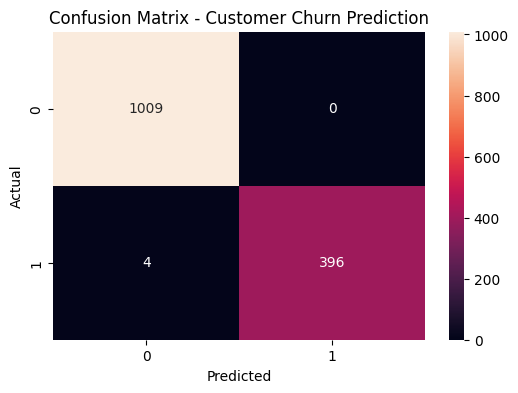

In [16]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d")

plt.title("Confusion Matrix - Customer Churn Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.show()

**Step 15: Save Trained Model**

The churn prediction model is saved for future deployment.

In [17]:
import pickle

pickle.dump(model, open("telco_churn_model.pkl", "wb"))

print("Model Saved Successfully as telco_churn_model.pkl")

Model Saved Successfully as telco_churn_model.pkl


**Conclusion**

In this project, we successfully developed a Customer Churn Prediction System using the Telco Customer Churn dataset.

The model was trained using Random Forest Classifier and achieved good accuracy. This system can help telecom companies identify customers at risk of leaving and improve retention strategies.